In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
df1 = pd.read_csv("/content/AusOpen-men-2013.csv")
df2 = pd.read_csv("/content/AusOpen-women-2013.csv")
df3 = pd.read_csv("/content/FrenchOpen-men-2013.csv")
df4 = pd.read_csv("/content/FrenchOpen-women-2013.csv")
df5 = pd.read_csv("/content/USOpen-men-2013-1.csv")
df6 = pd.read_csv("/content/USOpen-women-2013.csv")
df7 = pd.read_csv("/content/Wimbledon-men-2013.csv")
df8 = pd.read_csv("/content/Wimbledon-women-2013.csv")
all_dataframe = [df1,df2,df3,df4,df5,df6,df7,df8]

FileNotFoundError: ignored

## **1).**

In [ ]:
def get_win_count(df1):
  df1['Favourite'] = df1.apply(lambda x:1 if x['FSP.1']>x['FSP.2'] else 0, axis=1)
  favourable_win_1 = df1.loc[df1['Result']==df1['Favourite']].shape[0]
  unfavourable_win_1 = df1.loc[df1['Result']!=df1['Favourite']].shape[0]
  return favourable_win_1,unfavourable_win_1
def pie_plot(favourable_win_1,unfavourable_win_1,ax):

  labels = ['Favourable Wins', 'Unfavourable Wins']
  sizes = [favourable_win_1, unfavourable_win_1]
  colors = ['#66b3ff','#ff6666']
  sns.set_style("whitegrid")
  ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,textprops={'fontsize': 9})


win_count_list=[]
for data in all_dataframe:
  a,b = get_win_count(data)
  win_count_list.append([a,b])



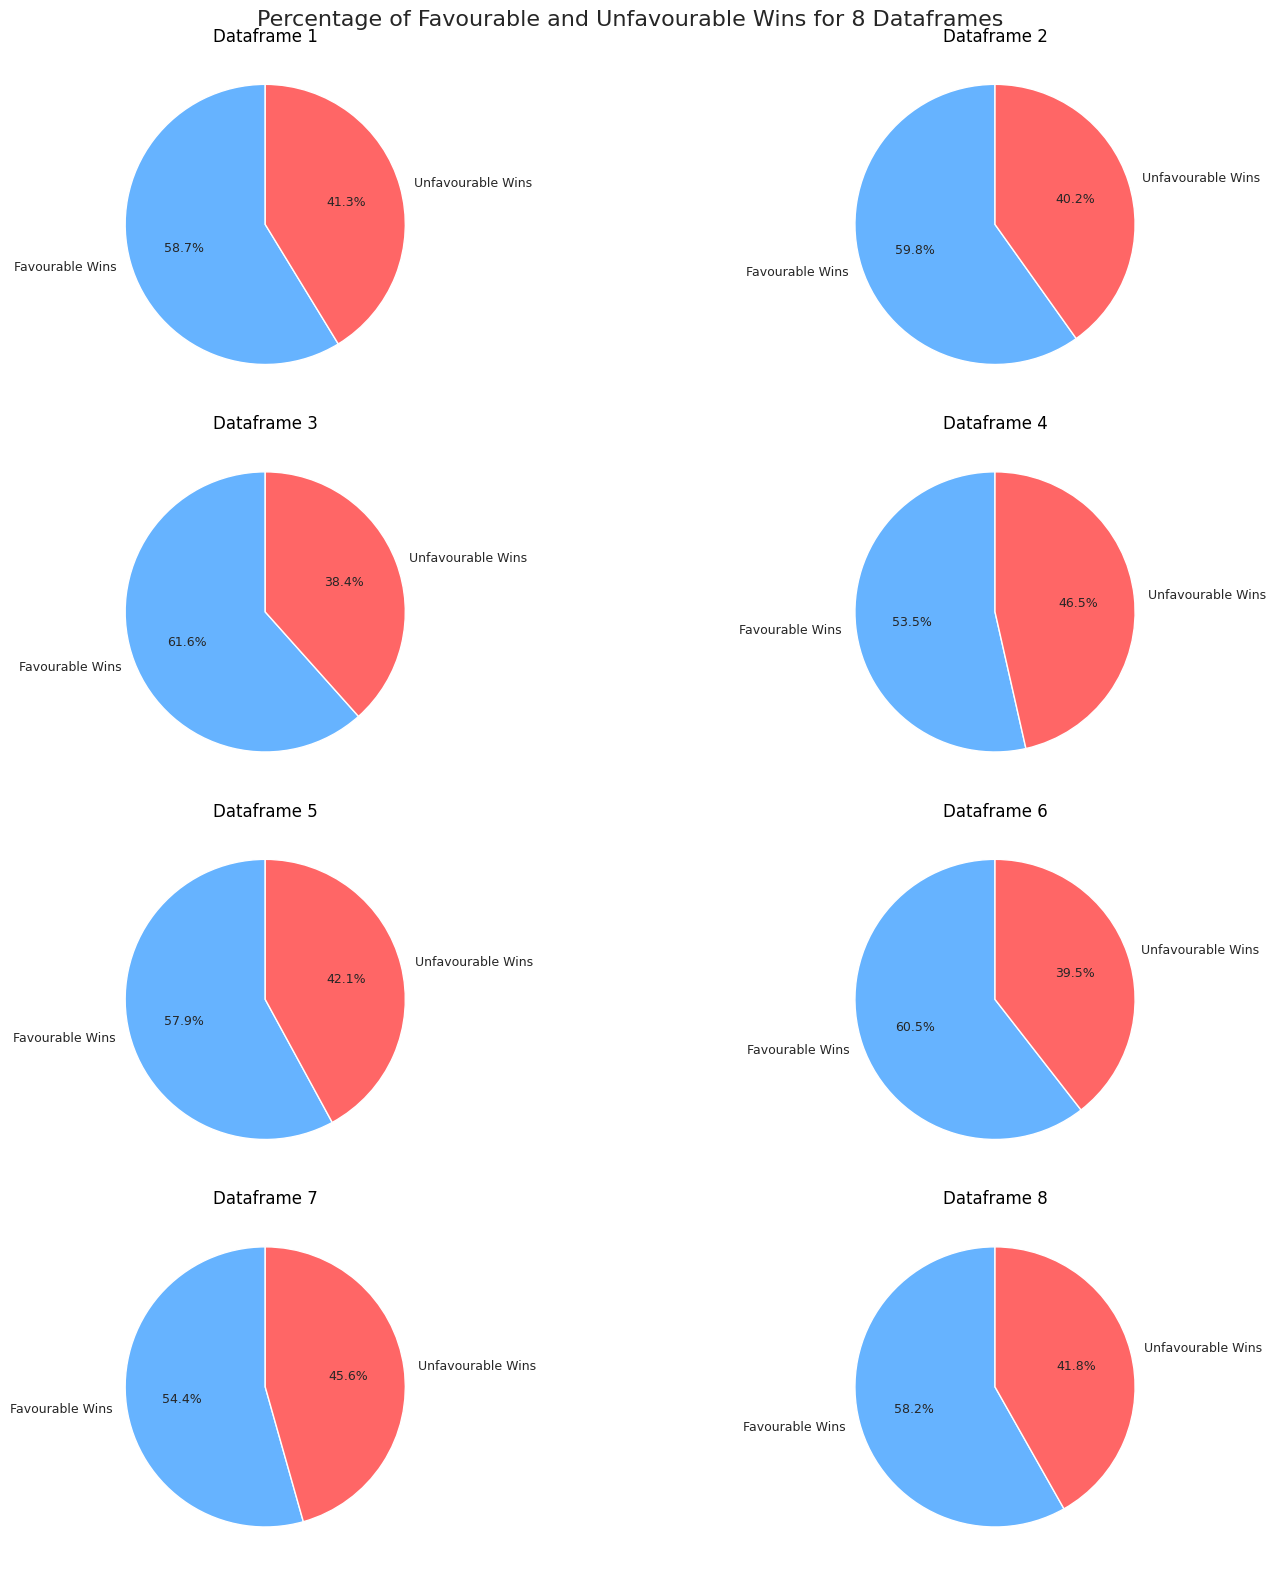

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))

# Loop over the list of win counts and create a pie chart for each one
for i, ax in enumerate(axes.flat):
    if i < len(win_count_list):
        favourable_win, unfavourable_win = win_count_list[i]
        ax.set_title(f"Dataframe {i+1}")
        pie_plot(favourable_win, unfavourable_win,ax)
    else:
        ax.set_visible(False)

# Add padding between subplots to avoid overlapping
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.suptitle('Percentage of Favourable and Unfavourable Wins for 8 Dataframes', fontsize=16)
plt.tight_layout()
plt.show()


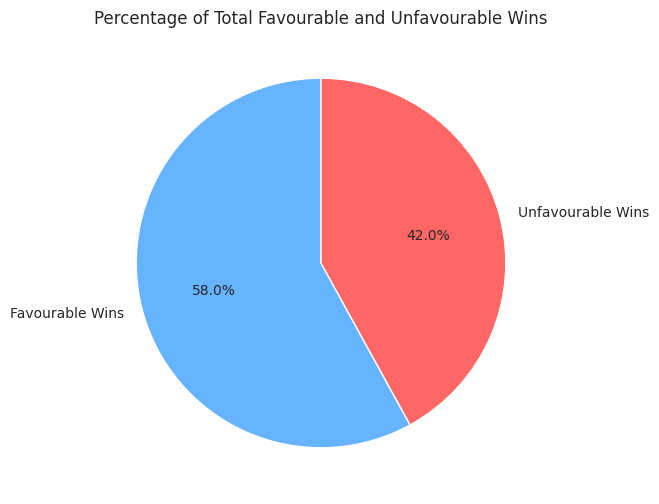

In [ ]:
total_favourable_win = 0
total_unfavourable_win = 0
for i in range(8):
  total_favourable_win += win_count_list[i][0]
for i in range(8):

  total_unfavourable_win += win_count_list[i][1]


plt.figure(figsize=(6,6))
labels = ['Favourable Wins', 'Unfavourable Wins']
sizes = [total_favourable_win, total_unfavourable_win]
colors = ['#66b3ff','#ff6666']
sns.set_style("whitegrid")
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Total Favourable and Unfavourable Wins')
plt.show()

## **4).**

In [ ]:
# FSP

new_df_1_FSP = all_dataframe[1][['Player1','FSP.1']]
new_df_1_FSP = new_df_1_FSP.sort_values(['FSP.1'], ascending=False).head(10)

new_df_2_FSP = all_dataframe[1][['Player2','FSP.2']]
new_df_2_FSP = new_df_2_FSP.sort_values(['FSP.2'], ascending=False).head(10)



In [ ]:
#DBF

new_df1_DBF = all_dataframe[1][['Player1','DBF.1']]
new_df1_DBF = new_df1_DBF.sort_values(['DBF.1']).head(10)

new_df2_DBF = all_dataframe[1][['Player2','DBF.2']]
new_df2_DBF = new_df2_DBF.sort_values(['DBF.2']).head(10)


In [ ]:
def Mean_DBF(df):
  m1 = df['DBF.1'].mean()
  m2 = df['DBF.2'].mean()
  avg = (m1+m2)/2
  avg = round(avg,2)
  return avg
def Mean_FSP(df):
  m1 = df['FSP.1'].mean()
  m2 = df['FSP.2'].mean()
  avg = (m1+m2)/2
  avg = round(avg,2)
  return avg

mean_FSP = []
mean_DBF = []
for i in range(0,8,2):
  a = Mean_FSP(all_dataframe[i])
  mean_FSP.append(a)
  b = Mean_DBF(all_dataframe[i])
  mean_DBF.append(b)
print(mean_DBF)
print(mean_FSP)

[4.48, 3.3, 4.77, 3.45]
[61.38, 62.41, 58.79, 64.1]


In [ ]:
merged_df_FSP = pd.concat([new_df_1_FSP.rename(columns={'Player1': 'Player', 'FSP.1': 'FSP'}),
                       new_df_2_FSP.rename(columns={'Player2': 'Player', 'FSP.2': 'FSP'})])

# Sort the merged dataframe by FSP in descending order
sorted_df_FSP = merged_df_FSP.sort_values('FSP', ascending=False)
sorted_df_FSP = sorted_df_FSP.drop_duplicates(subset=['Player'])
# Select the top 10 players with highest FSP
top_10_players_FSP = sorted_df_FSP.head(15)
top_10_players_FSP

,Player,FSP
21,Anabel Medina Garrigues,86
104,Kurumi Nara,86
95,Victoria Azarenka,85
22,Monica Niculescu,82
22,Shahar Peer,80
114,Na Li,80
40,Carla Suarez Navarro,79
77,Alison Riske,78
39,Katarzyna Piter,77
122,Dominika Cibulkova,77


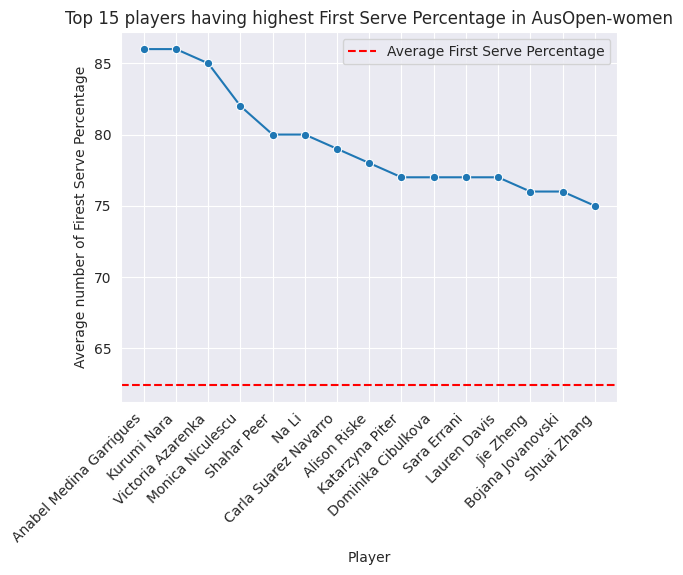

In [ ]:
sns.set_style("darkgrid")
plt.axhline(y=mean_FSP[1], color='red', linestyle='--',label = 'Average First Serve Percentage')
sns.lineplot(x=top_10_players_FSP['Player'], y=top_10_players_FSP['FSP'], marker='o')
plt.xticks(rotation=45, ha='right')
plt.title("Top 15 players having highest First Serve Percentage in AusOpen-women")
plt.xlabel("Player")
plt.ylabel("Average number of Firest Serve Percentage")
plt.legend()
plt.show()



In [ ]:
merged_df_DBF = pd.concat([new_df1_DBF.rename(columns={'Player1': 'Player', 'DBF.1': 'DBF'}),
                       new_df2_DBF.rename(columns={'Player2': 'Player', 'DBF.2': 'DBF'})])

# Sort the merged dataframe by FSP in descending order
sorted_df_DBF = merged_df_DBF.sort_values('DBF')
sorted_df_DBF = sorted_df_DBF.drop_duplicates(subset=['Player'])
# Select the top 10 players with highest FSP
top_10_players_DBF = sorted_df_DBF.head(15)


,Player,DBF
110,Sloane Stephens,0.0
69,Casey Dellacqua,0.0
106,Carla Suarez Navarro,0.0
16,Na Li,0.0
78,Flavia Pennetta,0.0
5,Tsvetana Pironkova,0.0
6,Annika Beck,0.0
15,Sara Errani,0.0
14,Lauren Davis,0.0
22,Monica Niculescu,0.0


In [ ]:
# Merge top_10_players_DBF and top_10_players_FSP dataframes on the 'Player' column
merged_df = pd.merge(top_10_players_DBF, top_10_players_FSP, on='Player')

# Extract the common players from the merged dataframe
common_players = set(merged_df['Player'])

# Convert the top 10 players dataframes to lists
top_10_players_DBF_list = top_10_players_DBF['Player'].tolist()
top_10_players_FSP_list = top_10_players_FSP['Player'].tolist()

# Create lists of players unique to each dataframe
unique_players_DBF = [player for player in top_10_players_DBF_list if player not in common_players]
unique_players_FSP = [player for player in top_10_players_FSP_list if player not in common_players]

# Print the common and unique players
print('Common players:', common_players)
print('Players unique to top_10_players_DBF:', unique_players_DBF)
print('Players unique to top_10_players_FSP:', unique_players_FSP)


Common players: {'Sara Errani', 'Na Li', 'Carla Suarez Navarro', 'Lauren Davis', 'Monica Niculescu'}
Players unique to top_10_players_DBF: ['Sloane Stephens', 'Casey Dellacqua', 'Flavia Pennetta', 'Tsvetana Pironkova', 'Annika Beck', 'Karolina Pliskova', 'Anastasia Pavlyuchenkova', 'Olga Govortsova', 'Ekaterina Makarova', 'Virginie Razzano']
Players unique to top_10_players_FSP: ['Anabel Medina Garrigues', 'Kurumi Nara', 'Victoria Azarenka', 'Shahar Peer', 'Alison Riske', 'Katarzyna Piter', 'Dominika Cibulkova', 'Jie Zheng', 'Bojana Jovanovski', 'Shuai Zhang']


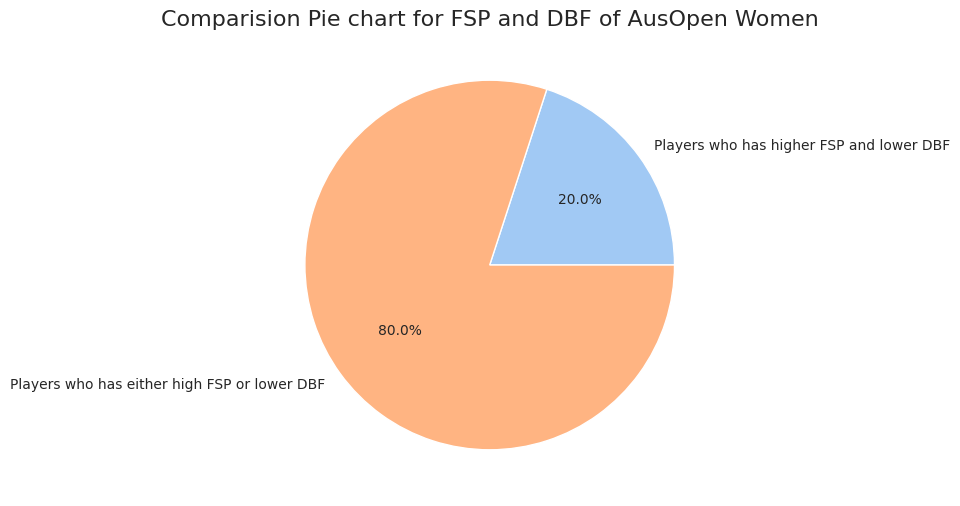

In [ ]:
# Find common players between top_10_players_DBF and top_10_players_FSP
common_players = list(set(top_10_players_DBF['Player']).intersection(set(top_10_players_FSP['Player'])))

# Find unique players in top_10_players_DBF and top_10_players_FSP
unique_players = list(set(top_10_players_DBF['Player']).symmetric_difference(set(top_10_players_FSP['Player'])))

# Create a list with the counts of common players and unique players
counts = [len(common_players), len(unique_players)]

# Create a pie chart
plt.figure(figsize=(6,6))
sns.set_palette("pastel")
sns.set_style("white")
plt.pie(counts, labels=['Players who has higher FSP and lower DBF', 'Players who has either high FSP or lower DBF'], autopct='%1.1f%%')
plt.title('Comparision Pie chart for FSP and DBF of AusOpen Women', fontsize=16)
plt.show()


In [ ]:
# FSP

new_df_1_FSP = all_dataframe[0][['Player1','FSP.1']]
new_df_1_FSP = new_df_1_FSP.sort_values(['FSP.1'], ascending=False).head(10)

new_df_2_FSP = all_dataframe[0][['Player2','FSP.2']]
new_df_2_FSP = new_df_2_FSP.sort_values(['FSP.2'], ascending=False).head(10)



In [ ]:
#DBF

new_df1_DBF = all_dataframe[0][['Player1','DBF.1']]
new_df1_DBF = new_df1_DBF.sort_values(['DBF.1']).head(10)

new_df2_DBF = all_dataframe[0][['Player2','DBF.2']]
new_df2_DBF = new_df2_DBF.sort_values(['DBF.2']).head(10)


In [ ]:
merged_df_FSP = pd.concat([new_df_1_FSP.rename(columns={'Player1': 'Player', 'FSP.1': 'FSP'}),
                       new_df_2_FSP.rename(columns={'Player2': 'Player', 'FSP.2': 'FSP'})])

# Sort the merged dataframe by FSP in descending order
sorted_df_FSP = merged_df_FSP.sort_values('FSP', ascending=False)
sorted_df_FSP = sorted_df_FSP.drop_duplicates(subset=['Player'])
# Select the top 10 players with highest FSP
top_10_players_FSP = sorted_df_FSP.head(15)
top_10_players_FSP

,Player,FSP
28,Ivan Dodig,83
107,Roberto Bautista Agut,83
74,Pablo Andujar,79
125,Rafael Nadal,78
40,John Isner,78
2,Denis Istomin,77
9,Nikolay Davydenko,77
4,Juan Monaco,76
80,Roger Federer,76
101,Edouard Roger-Vasselin,74


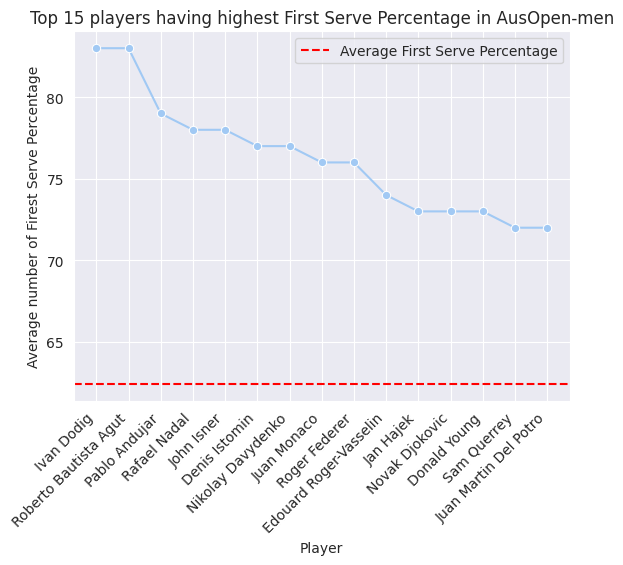

In [ ]:
sns.set_style("darkgrid")
plt.axhline(y=mean_FSP[1], color='red', linestyle='--',label = 'Average First Serve Percentage')
sns.lineplot(x=top_10_players_FSP['Player'], y=top_10_players_FSP['FSP'], marker='o')
plt.xticks(rotation=45, ha='right')
plt.title("Top 15 players having highest First Serve Percentage in AusOpen-men")
plt.xlabel("Player")
plt.ylabel("Average number of Firest Serve Percentage")
plt.legend()
plt.show()



In [ ]:
merged_df_DBF = pd.concat([new_df1_DBF.rename(columns={'Player1': 'Player', 'DBF.1': 'DBF'}),
                       new_df2_DBF.rename(columns={'Player2': 'Player', 'DBF.2': 'DBF'})])

# Sort the merged dataframe by FSP in descending order
sorted_df_DBF = merged_df_DBF.sort_values('DBF')
sorted_df_DBF = sorted_df_DBF.drop_duplicates(subset=['Player'])
# Select the top 10 players with highest FSP
top_10_players_DBF = sorted_df_DBF.head(15)
top_10_players_DBF

,Player,DBF
42,Michal Przysiezny,0.0
110,Rafael Nadal,0.0
104,Jo-Wilfried Tsonga,0.0
100,Florian Mayer,0.0
11,Tommy Robredo,0.0
31,Tomas Berdych,0.0
121,Roger Federer,0.0
26,Joao Sousa,0.0
0,Novak Djokovic,0.0
15,Andrey Golubev,0.0


In [ ]:
# Merge top_10_players_DBF and top_10_players_FSP dataframes on the 'Player' column
merged_df = pd.merge(top_10_players_DBF, top_10_players_FSP, on='Player')

# Extract the common players from the merged dataframe
common_players = set(merged_df['Player'])

# Convert the top 10 players dataframes to lists
top_10_players_DBF_list = top_10_players_DBF['Player'].tolist()
top_10_players_FSP_list = top_10_players_FSP['Player'].tolist()

# Create lists of players unique to each dataframe
unique_players_DBF = [player for player in top_10_players_DBF_list if player not in common_players]
unique_players_FSP = [player for player in top_10_players_FSP_list if player not in common_players]

# Print the common and unique players
print('Common players:', common_players)
print('Players unique to top_10_players_DBF:', unique_players_DBF)
print('Players unique to top_10_players_FSP:', unique_players_FSP)


Common players: {'Roger Federer', 'John Isner', 'Rafael Nadal', 'Novak Djokovic'}
Players unique to top_10_players_DBF: ['Michal Przysiezny', 'Jo-Wilfried Tsonga', 'Florian Mayer', 'Tommy Robredo', 'Tomas Berdych', 'Joao Sousa', 'Andrey Golubev', 'Rhyne Williams', 'Somdev Devvarman', 'Lukas Lacko', 'Federico Delbonis']
Players unique to top_10_players_FSP: ['Ivan Dodig', 'Roberto Bautista Agut', 'Pablo Andujar', 'Denis Istomin', 'Nikolay Davydenko', 'Juan Monaco', 'Edouard Roger-Vasselin', 'Jan Hajek', 'Donald Young', 'Sam Querrey', 'Juan Martin Del Potro']


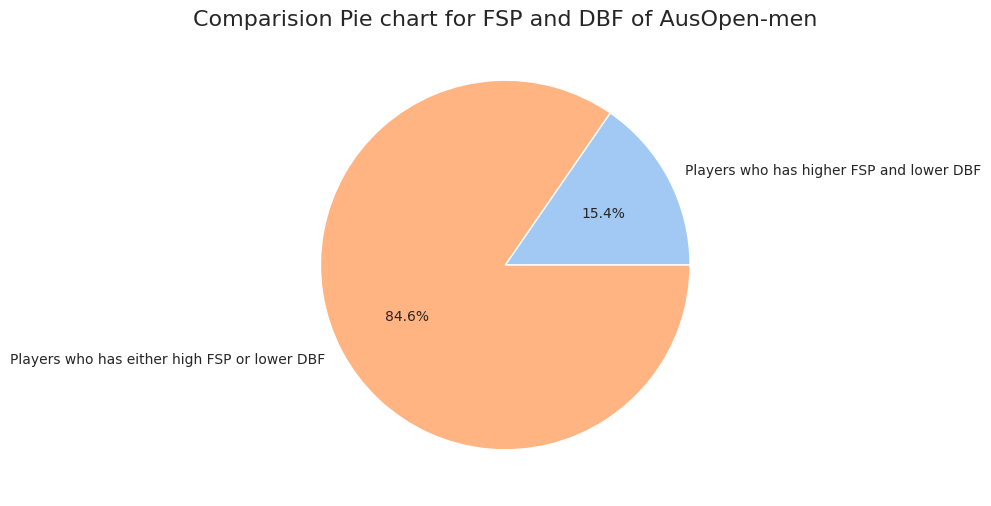

In [ ]:

# Find common players between top_10_players_DBF and top_10_players_FSP
common_players = list(set(top_10_players_DBF['Player']).intersection(set(top_10_players_FSP['Player'])))

# Find unique players in top_10_players_DBF and top_10_players_FSP
unique_players = list(set(top_10_players_DBF['Player']).symmetric_difference(set(top_10_players_FSP['Player'])))

# Create a list with the counts of common players and unique players
counts = [len(common_players), len(unique_players)]

# Create a pie chart
plt.figure(figsize=(6,6))
sns.set_palette("pastel")
sns.set_style("white")
plt.pie(counts, labels=['Players who has higher FSP and lower DBF', 'Players who has either high FSP or lower DBF'], autopct='%1.1f%%')
plt.title('Comparision Pie chart for FSP and DBF of AusOpen-men', fontsize=16)
plt.show()


## **2).**


In [ ]:
def add_aces_sum(df):
    df['ACES_SUM'] = df['ACE.1'] + df['ACE.2']
    return df
for i in range(len(all_dataframe)):
    all_dataframe[i] = add_aces_sum(all_dataframe[i])
avg_aces = [0]*8

for i in range(8):
  avg_aces[i] = all_dataframe[i]['ACES_SUM'].mean()
print(avg_aces)


[19.50793650793651, 5.80327868852459, 12.688, 4.271929824561403, 17.76984126984127, 5.157894736842105, 22.43859649122807, 6.245762711864407]


In [ ]:
men_avg_aces = []

for i in range(0,8,2):
  men_avg_aces.append(avg_aces[i])

women_avg_aces = []
for i in range(1,9,2):
  women_avg_aces.append(avg_aces[i])

men_avg_aces_rounded = [round(avg, 2) for avg in men_avg_aces]
women_avg_aces_rounded = [round(avg, 2) for avg in women_avg_aces]

print(men_avg_aces_rounded)
print(women_avg_aces_rounded)
men_avg_aces_rounded.sort()
women_avg_aces_rounded.sort()

[19.51, 12.69, 17.77, 22.44]
[5.8, 4.27, 5.16, 6.25]


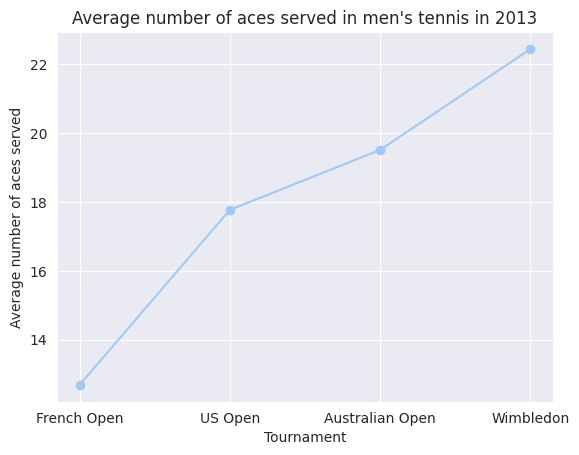

In [ ]:
# Data
tournaments = ['French Open', 'US Open', 'Australian Open', 'Wimbledon']

# Plot
sns.set_style("darkgrid")
plt.plot(tournaments, men_avg_aces_rounded, marker='o')
plt.title("Average number of aces served in men's tennis in 2013")
plt.xlabel("Tournament")
plt.ylabel("Average number of aces served")
plt.show()


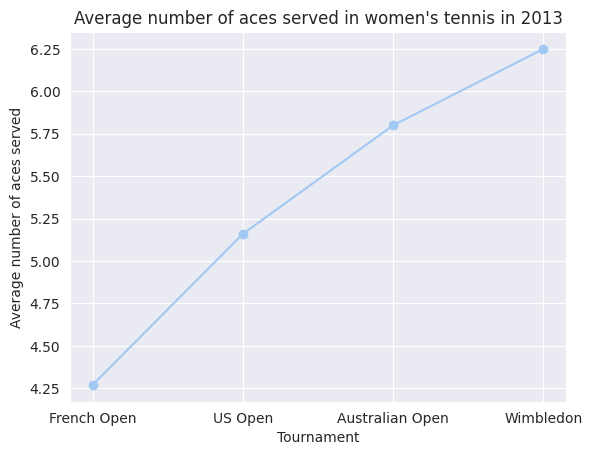

In [ ]:
# Data
tournaments = ['French Open', 'US Open', 'Australian Open', 'Wimbledon']

# Plot
sns.set_style("darkgrid")
plt.plot(tournaments, women_avg_aces_rounded, marker='o')
plt.title("Average number of aces served in women's tennis in 2013")
plt.xlabel("Tournament")
plt.ylabel("Average number of aces served")
plt.show()


## **3).**

[30.62, 28.97, 38.12, 65.03]
[14.27, 15.08, 28.12, 32.6]


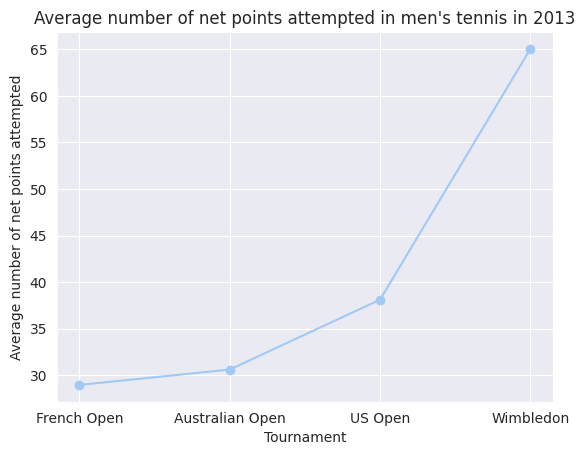

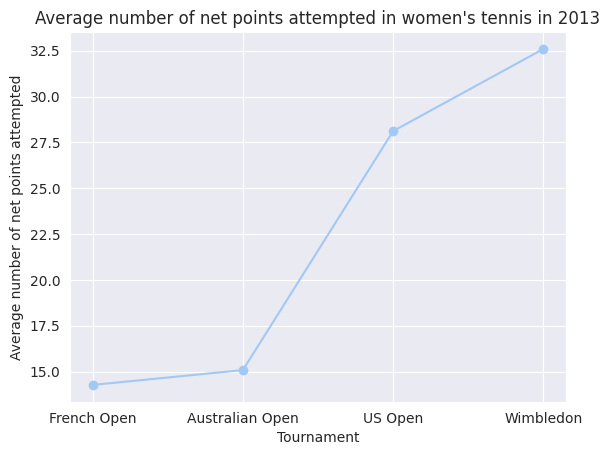

In [ ]:
# Define a function to add the net points attempted column
def add_npa_sum(df):
    df['NPA_SUM'] = df['NPA.1'] + df['NPA.2']
    return df

# Add the net points attempted column to each data frame
for i in range(len(all_dataframe)):
    all_dataframe[i] = add_npa_sum(all_dataframe[i])

# Calculate the average number of net points attempted
avg_npa = [0]*8
for i in range(8):
  avg_npa[i] = all_dataframe[i]['NPA_SUM'].mean()

# Separate the average number of net points attempted for men and women
men_avg_npa = []
for i in range(0,8,2):
  men_avg_npa.append(avg_npa[i])

women_avg_npa = []
for i in range(1,9,2):
  women_avg_npa.append(avg_npa[i])

# Round the values to two decimal places
men_avg_npa_rounded = [round(avg, 2) for avg in men_avg_npa]
women_avg_npa_rounded = [round(avg, 2) for avg in women_avg_npa]
print(men_avg_npa_rounded)
print(women_avg_npa_rounded)
# Sort the values in ascending order
men_avg_npa_rounded.sort()
women_avg_npa_rounded.sort()

# Plot the line graph for men
sns.set_style("darkgrid")
tournaments_1 = ['French Open',  'Australian Open','US Open', 'Wimbledon']
plt.plot(tournaments_1, men_avg_npa_rounded, marker='o')
plt.title("Average number of net points attempted in men's tennis in 2013")
plt.xlabel("Tournament")
plt.ylabel("Average number of net points attempted")
plt.show()

# Plot the line graph for women
sns.set_style("darkgrid")
plt.plot(tournaments_1, women_avg_npa_rounded, marker='o')
plt.title("Average number of net points attempted in women's tennis in 2013")
plt.xlabel("Tournament")
plt.ylabel("Average number of net points attempted")
plt.show()


## **6).**

[18.1, 19.0, 20.51, 5.66]
[16.4, 16.43, 7.34, 6.72]


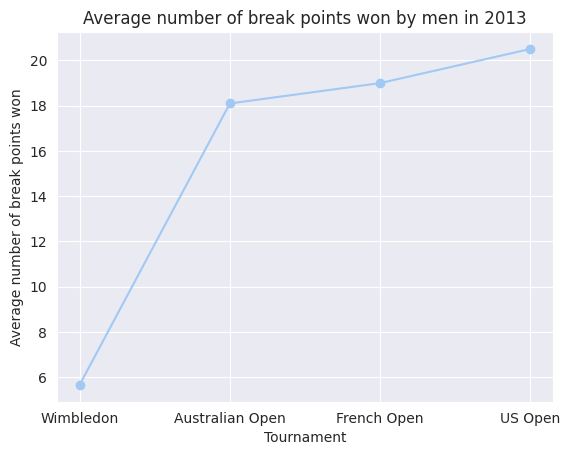

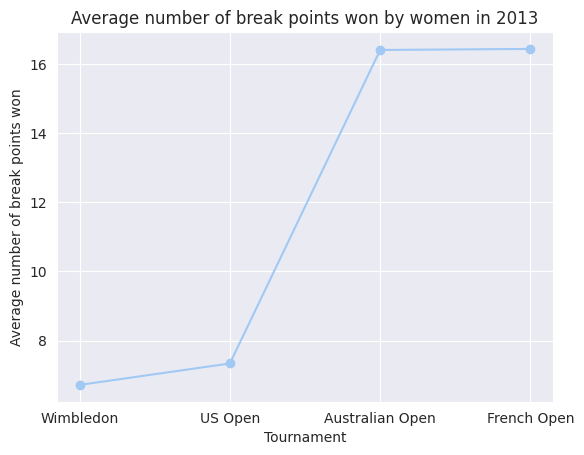

In [ ]:
def add_break_points_sum(df):
    df['BREAK_POINTS_SUM'] = df['BPW.1'] + df['BPW.2']
    return df

# Add break points sum column to all dataframes
for i in range(len(all_dataframe)):
    all_dataframe[i] = add_break_points_sum(all_dataframe[i])

# Calculate average break points won
avg_break_points = [0]*8
for i in range(8):
    avg_break_points[i] = all_dataframe[i]['BREAK_POINTS_SUM'].mean()

# Separate men and women data
men_avg_break_points = []
women_avg_break_points = []
for i in range(0,8,2):
    men_avg_break_points.append(avg_break_points[i])
for i in range(1,9,2):
    women_avg_break_points.append(avg_break_points[i])

# Round values to two decimal places
men_avg_break_points_rounded = [round(avg, 2) for avg in men_avg_break_points]
women_avg_break_points_rounded = [round(avg, 2) for avg in women_avg_break_points]
print(men_avg_break_points_rounded)
print(women_avg_break_points_rounded)
# Sort values
men_avg_break_points_rounded.sort()
women_avg_break_points_rounded.sort()

# Plot men's data
tournaments_2 = ['Wimbledon','Australian Open','French Open', 'US Open']
sns.set_style("darkgrid")
plt.plot(tournaments_2, men_avg_break_points_rounded, marker='o')
plt.title("Average number of break points won by men in 2013")
plt.xlabel("Tournament")
plt.ylabel("Average number of break points won")
plt.show()

# Plot women's data
tournaments_3 = ['Wimbledon','US Open','Australian Open','French Open']
sns.set_style("darkgrid")
plt.plot(tournaments_3, women_avg_break_points_rounded, marker='o')
plt.title("Average number of break points won by women in 2013")
plt.xlabel("Tournament")
plt.ylabel("Average number of break points won")
plt.show()


## **8).**

In [ ]:
predictions = []

for index, row in df1.iterrows():
    diff1 = row['WNR.1'] + row['BPW.1']- row['UFE.1'] - row['DBF.1']
    diff2 = row['WNR.2'] + row['BPW.2']- row['UFE.2'] - row['DBF.2']

    # predict the outcome based on the player with the higher difference
    if diff1 > diff2:
        predictions.append(1)
    else:
        predictions.append(0)


In [ ]:
# create a new column named "Prediction" and store the predicted values
df1 = df1.assign(Prediction=predictions)

# print the updated DataFrame to verify the new column
print(df1.head())


            Player1          Player2  Round  Result  FNL1  FNL2  FSP.1  FSW.1  \
0       Lukas Lacko   Novak Djokovic      1       0     0     3     61     35   
1    Leonardo Mayer  Albert Montanes      1       1     3     0     61     31   
2  Marcos Baghdatis    Denis Istomin      1       0     0     3     52     53   
3   Dmitry Tursunov  Michael Russell      1       1     3     0     53     39   
4       Juan Monaco   Ernests Gulbis      1       0     1     3     76     63   

   SSP.1  SSW.1  ...  ST1.2  ST2.2  ST3.2  ST4.2  ST5.2  Favourite  ACES_SUM  \
0     39     18  ...      6    7.0    6.0    NaN    NaN          0        57   
1     39     13  ...      1    3.0    1.0    NaN    NaN          1        14   
2     48     20  ...      6    7.0    6.0    NaN    NaN          0        78   
3     47     24  ...      2    2.0    3.0    NaN    NaN          1         9   
4     24     12  ...      1    6.0    7.0    6.0    NaN          1        75   

   NPA_SUM  BREAK_POINTS_SUM  Pr

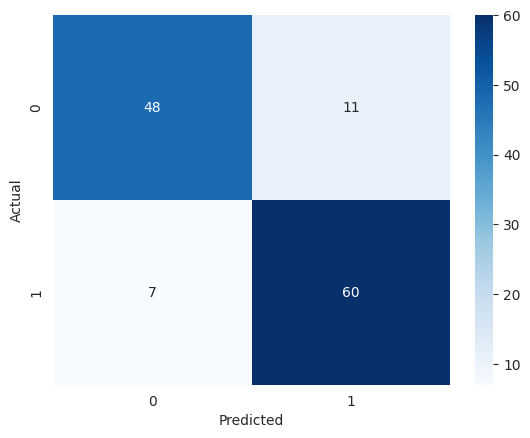

In [ ]:
cm = confusion_matrix(df1['Result'], df1['Prediction'])

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


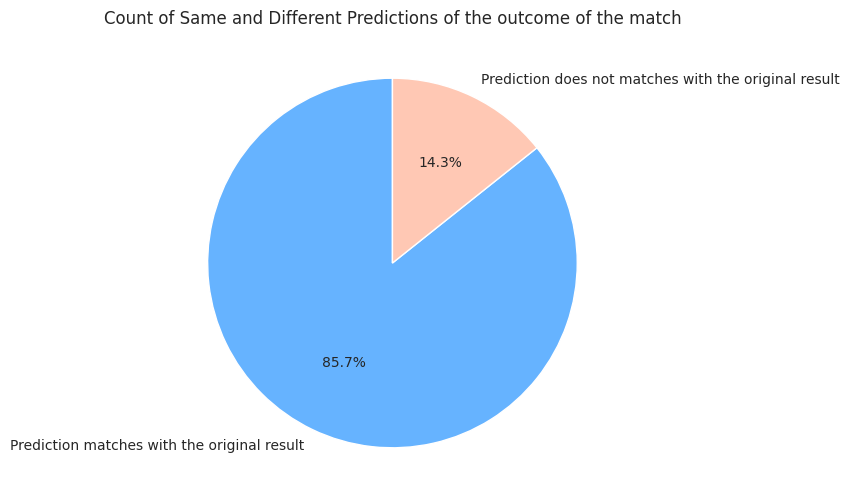

In [ ]:

# Get the count of same and different predictions
same_count = len(df1[df1['Result'] == df1['Prediction']])
diff_count = len(df1[df1['Result'] != df1['Prediction']])

# Create a list of labels and values
labels = ['Prediction matches with the original result', 'Prediction does not matches with the original result']
values = [same_count, diff_count]

# Create the pie chart using Seaborn
sns.set_style("dark")
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=["#66b3ff","#FFC8B4"], startangle=90)
plt.title('Count of Same and Different Predictions of the outcome of the match')
plt.show()


In [ ]:
all_players_round4played

[{'Andy Murray',
  'David Ferrer',
  'Grigor Dimitrov',
  'Novak Djokovic',
  'Rafael Nadal',
  'Roger Federer',
  'Stanislas Wawrinka',
  'Tomas Berdych'},
 {'Agnieszka Radwanska',
  'Ana Ivanovic',
  'Dominika Cibulkova',
  'Eugenie Bouchard',
  'Flavia Pennetta',
  'Na Li',
  'Simona Halep',
  'Victoria Azarenka'},
 {'David Ferrer',
  'Jo-Wilfried Tsonga',
  'Novak Djokovic',
  'Rafael Nadal',
  'Roger Federer',
  'Stanislas Wawrinka',
  'Tommy Haas',
  'Tommy Robredo'},
 {'Agnieszka Radwanska',
  'Jelena Jankovic',
  'Maria Kirilenko',
  'Maria Sharapova',
  'Sara Errani',
  'Serena Williams',
  'Svetlana Kuznetsova',
  'Victoria Azarenka'},
 {'Andy Murray',
  'David Ferrer',
  'Mikhail Youzhny',
  'Novak Djokovic',
  'Rafael Nadal',
  'Richard Gasquet',
  'Stanislas Wawrinka',
  'Tommy Robredo'},
 {'D Hantuchova', 'E Makarova', 'F Pennetta', 'N Li', 'R Vinci', 'V Azarenka'},
 {'A.Murray',
  'D.Ferrer',
  'F.Verdasco',
  'J.Del Potro',
  'J.Janowicz',
  'L.Kubot',
  'N.Djokovic',
 

## **7).**

In [ ]:
all_players_round6played = []
j = 0
while j<8:
  if j!=5:
    round6_players = set(all_dataframe[j].loc[all_dataframe[j]['Round'] == 6]['Player1']).union(set(all_dataframe[j].loc[all_dataframe[j]['Round'] == 6]['Player2']))
    all_players_round6played.append(round6_players)
  else:
    round6_players = set(all_dataframe[j].loc[all_dataframe[j]['ROUND'] == 6]['Player 1']).union(set(all_dataframe[j].loc[all_dataframe[j]['ROUND'] == 6]['Player 2']))
    all_players_round6played.append(round6_players)
  j+=1
all_players_round6played

[{'Rafael Nadal', 'Roger Federer', 'Stanislas Wawrinka', 'Tomas Berdych'},
 {'Agnieszka Radwanska', 'Dominika Cibulkova', 'Eugenie Bouchard', 'Na Li'},
 {'David Ferrer', 'Jo-Wilfried Tsonga', 'Novak Djokovic', 'Rafael Nadal'},
 {'Maria Sharapova', 'Sara Errani', 'Serena Williams', 'Victoria Azarenka'},
 {'Novak Djokovic', 'Rafael Nadal', 'Richard Gasquet', 'Stanislas Wawrinka'},
 {'F Pennetta', 'N Li', 'S Williams', 'V Azarenka'},
 {'A.Murray', 'J.Del Potro', 'J.Janowicz', 'N.Djokovic'},
 {'A.Radwanska', 'K.Flipkens', 'M.Bartoli', 'S.Lisicki'}]

In [ ]:
def Mean_BPW(df):
  m1 = df['BPW.1'].mean()
  m2 = df['BPW.2'].mean()
  avg = (m1+m2)/2
  avg = round(avg,2)
  return avg
mean_BPW_f = Mean_BPW(df3)
mean_BPW_w = Mean_BPW(df7)

def Mean_WNR(df):
  m1 = df['WNR.1'].mean()
  m2 = df['WNR.2'].mean()
  avg = (m1+m2)/2
  avg = round(avg,2)
  return avg
mean_WNR_f = Mean_WNR(df3)
mean_WNR_w = Mean_WNR(df7)

def Mean_DBF(df):
  m1 = df['DBF.1'].mean()
  m2 = df['DBF.2'].mean()
  avg = (m1+m2)/2
  avg = round(avg,2)
  return avg
mean_DBF_f = Mean_DBF(df3)
mean_DBF_w = Mean_DBF(df7)

def Mean_UFE(df):
  m1 = df['UFE.1'].mean()
  m2 = df['UFE.2'].mean()
  avg = (m1+m2)/2
  avg = round(avg,2)
  return avg
mean_UFE_f = Mean_UFE(df3)
mean_UFE_w = Mean_UFE(df7)



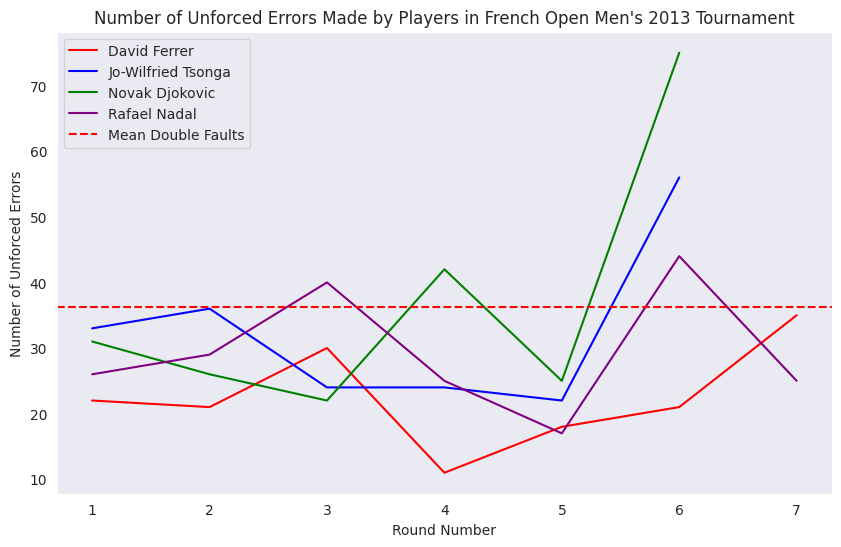

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df3 = pd.read_csv("/content/FrenchOpen-men-2013.csv")

# Select the relevant columns for the given players and their unforced errors
df_player1 = df3[df3['Player1'].isin(['David Ferrer', 'Jo-Wilfried Tsonga', 'Novak Djokovic', 'Rafael Nadal'])][['Player1', 'Round', 'UFE.1']]
df_player2 = df3[df3['Player2'].isin(['David Ferrer', 'Jo-Wilfried Tsonga', 'Novak Djokovic', 'Rafael Nadal'])][['Player2', 'Round', 'UFE.2']]
df_player1.columns = ['Player', 'Round', 'UFE']
df_player2.columns = ['Player', 'Round', 'UFE']
df_unforced_errors = pd.concat([df_player1, df_player2], ignore_index=True)

# Group the data by player and round number and compute the sum of unforced errors
grouped = df_unforced_errors.groupby(['Player', 'Round'])['UFE'].sum().reset_index()

# Create a line graph for each player
fig, ax = plt.subplots(figsize=(10, 6))
players = ['David Ferrer', 'Jo-Wilfried Tsonga', 'Novak Djokovic', 'Rafael Nadal']
colors = ['red', 'blue', 'green', 'purple']
for player, color in zip(players, colors):
    player_data = grouped[grouped['Player'] == player]
    ax.plot(player_data['Round'], player_data['UFE'], label=player, color=color)

ax.legend()
ax.set_xlabel('Round Number')
ax.set_ylabel('Number of Unforced Errors')
ax.set_title("Number of Unforced Errors Made by Players in French Open Men's 2013 Tournament")
plt.axhline(y=mean_UFE_f, color='red', linestyle='--',label="Mean Double Faults")
plt.legend()
plt.show()


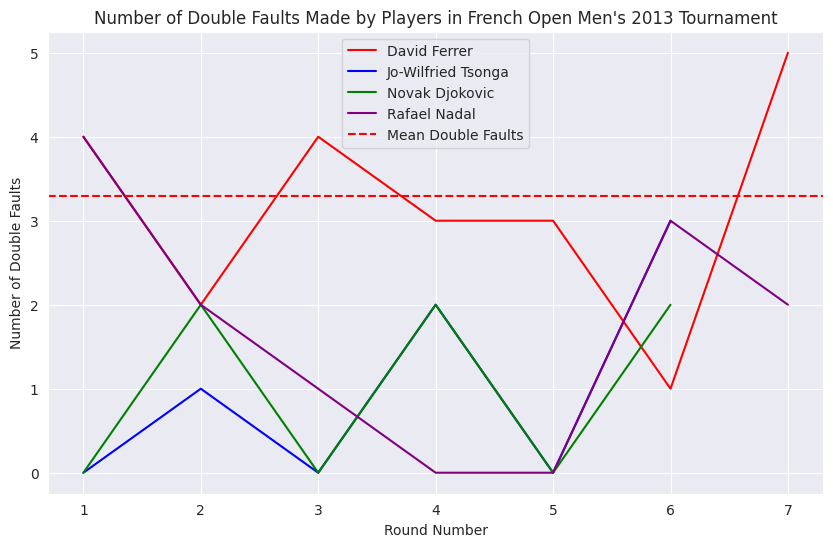

In [ ]:

# Select the relevant columns for the given players and their double faults
df_player1 = df3[df3['Player1'].isin(['David Ferrer', 'Jo-Wilfried Tsonga', 'Novak Djokovic', 'Rafael Nadal'])][['Player1', 'Round', 'DBF.1']]
df_player2 = df3[df3['Player2'].isin(['David Ferrer', 'Jo-Wilfried Tsonga', 'Novak Djokovic', 'Rafael Nadal'])][['Player2', 'Round', 'DBF.2']]
df_player1.columns = ['Player', 'Round', 'DBF']
df_player2.columns = ['Player', 'Round', 'DBF']
df_double_faults = pd.concat([df_player1, df_player2], ignore_index=True)

# Group the data by player and round number and compute the sum of double faults
grouped = df_double_faults.groupby(['Player', 'Round'])['DBF'].sum().reset_index()

# Create a line graph for each player
fig, ax = plt.subplots(figsize=(10, 6))
players = ['David Ferrer', 'Jo-Wilfried Tsonga', 'Novak Djokovic', 'Rafael Nadal']
colors = ['red', 'blue', 'green', 'purple']
for player, color in zip(players, colors):
    player_data = grouped[grouped['Player'] == player]
    ax.plot(player_data['Round'], player_data['DBF'], label=player, color=color)

ax.legend()
ax.set_xlabel('Round Number')
ax.set_ylabel('Number of Double Faults')
ax.set_title("Number of Double Faults Made by Players in French Open Men's 2013 Tournament")
ax.grid(True)
plt.axhline(y=mean_DBF_f, color='red', linestyle='--',label="Mean Double Faults")
plt.legend()
plt.show()


## **5).**

In [ ]:
new_df_1 = df7[['Player1', 'FSP.1']]
new_df_1 = new_df_1.sort_values('FSP.1', ascending=False)
top_10_players_1 = new_df_1.head(10)
new_df_2 = df7[['Player2', 'FSP.2']]
new_df_2 = new_df_2.sort_values('FSP.2', ascending=False)
top_10_players_2 = new_df_2.head(10)
merged_df = pd.concat([top_10_players_1.rename(columns={'Player1': 'Player', 'FSP.1': 'FSP'}),
                       top_10_players_2.rename(columns={'Player2': 'Player', 'FSP.2': 'FSP'})])
sorted_df = merged_df.sort_values('FSP', ascending=False)
sorted_df.drop_duplicates(subset=['Player'], keep='first', inplace=True)
top_10_players_FSP = sorted_df.head(10)

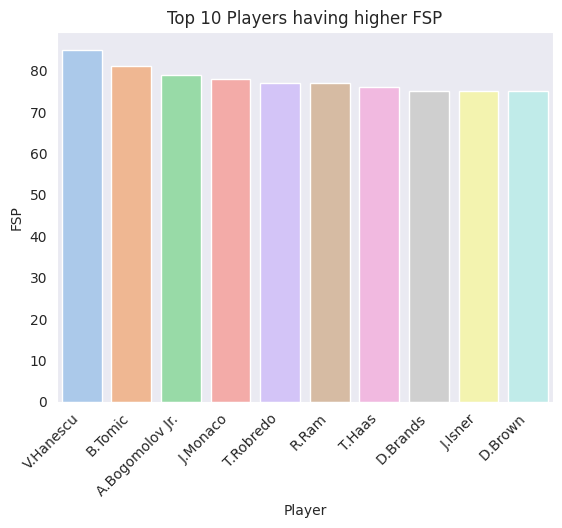

In [ ]:
sns.barplot(x='Player', y='FSP', data=top_10_players_FSP)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Players having higher FSP")
plt.show()

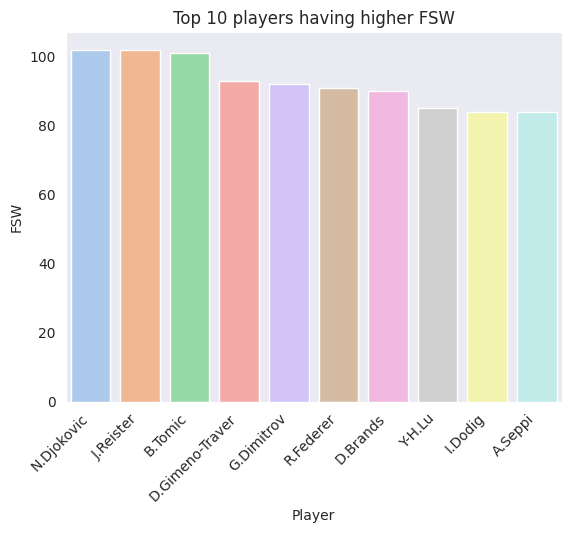

In [ ]:
new_df_1 = df7[['Player1', 'FSW.1']]
new_df_1 = new_df_1.sort_values('FSW.1', ascending=False)
top_10_players_1 = new_df_1.head(10)

new_df_2 = df7[['Player2', 'FSW.2']]
new_df_2 = new_df_2.sort_values('FSW.2', ascending=False)
top_10_players_2 = new_df_2.head(10)

merged_df = pd.concat([top_10_players_1.rename(columns={'Player1': 'Player', 'FSW.1': 'FSW'}),
                       top_10_players_2.rename(columns={'Player2': 'Player', 'FSW.2': 'FSW'})])
sorted_df = merged_df.sort_values('FSW', ascending=False)
sorted_df.drop_duplicates(subset=['Player'], keep='first', inplace=True)
top_10_players_FSW = sorted_df.head(10)

sns.barplot(x='Player', y='FSW', data=top_10_players_FSW)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 players having higher FSW')
plt.show()


In [ ]:

for player in top_10_players_FSW['Player']:
    # Create a new dataframe with rows that contain the player name either in the "Player1" or "Player2" column
    player_df = df7[(df7['Player1'] == player) | (df7['Player2'] == player)]

    if player_df.empty:
        print(f"{player} was not able to advance past the first round.")
    else:
        # Find the maximum value of the "Round" column in the player's dataframe
        max_round = player_df['Round'].max()
        print(f"{player} was disqualified in round {max_round}.")


N.Djokovic was disqualified in round 7.
J.Reister was disqualified in round 2.
B.Tomic was disqualified in round 4.
D.Gimeno-Traver was disqualified in round 1.
G.Dimitrov was disqualified in round 2.
R.Federer was disqualified in round 2.
D.Brands was disqualified in round 2.
Y-H.Lu was disqualified in round 2.
I.Dodig was disqualified in round 4.
A.Seppi was disqualified in round 4.


Players present in both top 10 lists:
{'D.Brands', 'B.Tomic'}
Players present in either top 10 list:
{'J.Isner', 'I.Dodig', 'A.Seppi', 'R.Ram', 'J.Reister', 'T.Robredo', 'A.Bogomolov Jr.', 'D.Brown', 'N.Djokovic', 'Y-H.Lu', 'V.Hanescu', 'J.Monaco', 'T.Haas', 'D.Gimeno-Traver', 'R.Federer', 'G.Dimitrov'}


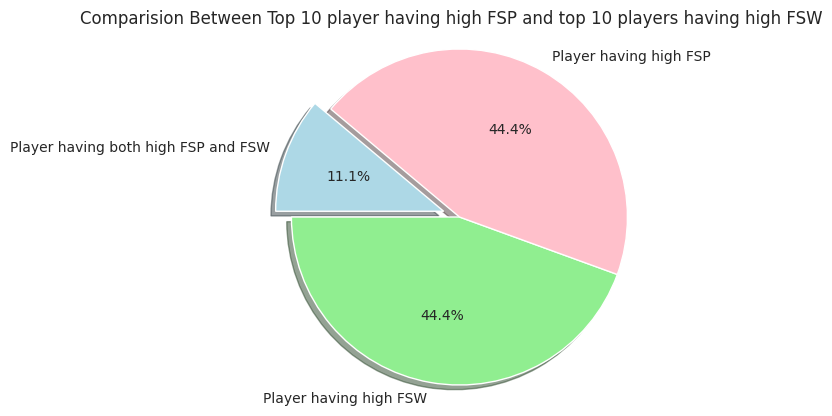

In [ ]:
players_FSW = set(top_10_players_FSW['Player'])
players_FSP = set(top_10_players_FSP['Player'])
players_both = players_FSW.intersection(players_FSP)
players_either = players_FSW.symmetric_difference(players_FSP)
print("Players present in both top 10 lists:")
print(players_both)
print("Players present in either top 10 list:")
print(players_either)

# Create a pie chart to visualize the overlap
import matplotlib.pyplot as plt

labels = ['Player having both high FSP and FSW', 'Player having high FSW', 'Player having high FSP']
sizes = [len(players_both), len(players_FSW) - len(players_both), len(players_FSP) - len(players_both)]
colors = ['lightblue', 'lightgreen', 'pink']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Comparision Between Top 10 player having high FSP and top 10 players having high FSW")
plt.axis('equal')
plt.show()


In [ ]:
# Select only the matches played by the players in the list
mask = df7['Player1'].isin(['D.Brands', 'B.Tomic']) | df7['Player2'].isin(['D.Brands', 'B.Tomic'])
filtered_df = df7[mask]

# Find the maximum round played by any player in the list
max_round = filtered_df['Round'].max()

print(f"All players in the list were disqualified after round {max_round}")


All players in the list were disqualified after round 4
